In [19]:
import pandas as pd
import numpy as np
from joblib import load

cdfs = load('Data/composer_dfs')
cdfs

,0,1,2,key_presses,merged
0,Data/ChopinKeyboard/Chop-28-8.mid,channel note velocity time note_type ...,chopin,channel note velocity time note_type ...,15 16 17 18 19 20 21 22 23 2...
1,Data/ChopinKeyboard/Chop-28-23.mid,channel note velocity time note_type ...,chopin,channel note velocity time note_type ...,15 16 17 18 19 20 21 22 23 2...
2,Data/ChopinKeyboard/Chop-28-22.mid,channel note velocity time note_type ...,chopin,channel note velocity time note_type ...,15 16 17 18 19 20 21 22 23 2...
3,Data/ChopinKeyboard/10-02-i.mid,channel note velocity time note_type ...,chopin,channel note velocity time note_type ...,15 16 17 18 19 20 21 22 23 2...
4,Data/ChopinKeyboard/Chop-28-9.mid,channel note velocity time note_type ...,chopin,channel note velocity time note_type ...,15 16 17 18 19 20 21 22 23 2...
...,...,...,...,...,...
5,Data/RachmaninoffKeyboard/rach-prelude23-02.mid,channel note velocity time note_type ...,rachmaninoff,channel note velocity time note_type ...,15 16 17 18 19 20 21 22 23 2...
6,Data/RachmaninoffKeyboard/rach-prelude23-01.mid,channel note velocity time note_type ...,rachmaninoff,channel note velocity time note_type ...,15 16 17 18 19 20 21 22 23 2...
7,Data/RachmaninoffKeyboard/rach-prelude-op3-no2...,channel note velocity time note_type ...,rachmaninoff,channel note velocity time note_type ...,15 16 17 18 19 20 21 22 23 2...
8,Data/RachmaninoffKeyboard/rach-prelude23-09.mid,channel note velocity time note_type ...,rachmaninoff,channel note velocity time note_type ...,15 16 17 18 19 20 21 22 23 2...


### Goal: Try to model rhythm as well

In [20]:
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder

cdfs.key_presses.iloc[0]
#"explode" each note/length combo into sparse data
#add a row for every 1 increment in cumtime, mark that row with whatever notes are held down
#then do the same chunking with a sliding window over time
#then use convolutional layers on the chunks

,channel,note,velocity,time,note_type,cumtime,length
0,0,61,90,0,note_on,0,288.0
1,1,57,90,0,note_on,0,64.0
2,0,73,90,48,note_on,48,48.0
3,1,49,90,0,note_on,64,64.0
6,0,68,90,0,note_on,96,48.0
...,...,...,...,...,...,...,...
3107,0,61,90,0,note_on,50304,297.0
3108,0,65,90,0,note_on,50304,297.0
3112,0,65,90,0,note_on,50601,86.0
3114,0,61,90,1,note_on,50688,1536.0


<AxesSubplot:xlabel='cumtime', ylabel='note'>

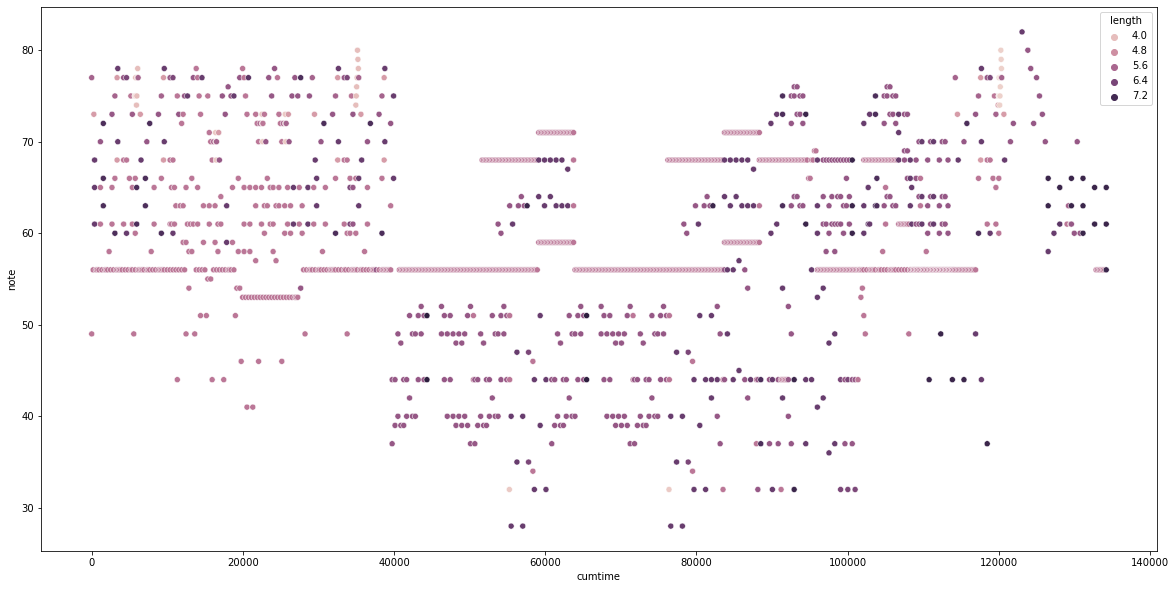

In [33]:
import seaborn as sns
from matplotlib import pyplot as plt

k = cdfs.key_presses.iloc[32].copy()
k.length = np.log(k.length)

plt.figure(figsize=(20,10))

sns.scatterplot(x = 'cumtime', y = 'note', hue = 'length', data = k)

In [40]:
def explode_notes(piece):
    #onehotencode notes
    piece_encoder = OneHotEncoder(categories = [np.arange(15,115)])
    note_encoded = piece_encoder.fit_transform(piece['note'].values.reshape(-1,1))
    transformed = np.concatenate((note_encoded.toarray(),
                                  piece.cumtime.values.reshape(-1,1),
                                  piece.length.values.reshape(-1,1)),axis=1)
    transfored = pd.DataFrame(transformed)
    idx_cumtime, idx_length = 100, 101
    #explode into more notes
    #for each note duplicate and then combine
    return transformed

explode_notes(cdfs.key_presses.iloc[0]).astype(int)

array([[    0,     0,     0, ...,     0,     0,   288],
       [    0,     0,     0, ...,     0,     0,    64],
       [    0,     0,     0, ...,     0,    48,    48],
       ...,
       [    0,     0,     0, ...,     0, 50601,    86],
       [    0,     0,     0, ...,     0, 50688,  1536],
       [    0,     0,     0, ...,     0, 50688,  1536]])